# 0. Introdução

**Trabalho Clustering**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset ;
- - selecionando alguns atributos e descartando outros;
- Aplique três métodos de clustering distintos nas duas bases acima.
- Para cada dataset , em cada uma das bases, analise os resultados
 segundo medidas de qualidade de clustering , usando índices de
 validação interna (SSW, SSB, silhueta, Calinski-Harabasz, Dunn e
 Davis-Bouldin) e externa (pureza, entropia, acurácia, F-measure ,
 ARI, NMI).
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada dataset


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [96]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import *
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# KFold
from sklearn.model_selection import KFold
import random

# Classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from  sklearn.metrics  import  roc_auc_score
from sklearn.metrics import balanced_accuracy_score

from sklearn.datasets import load_iris

# 1. Dados

Para realização das tarefas envolvidas neste relatório utilizou-se o arquivo **dim128.csv** que contém dados não descritos, onde foram feitos para a realização de clustering que se encontram no site:
http://cs.uef.fi/sipu/datasets/

## 1.1 Carregamento do arquivo

In [97]:
(data, label) = load_iris(return_X_y=True, as_frame = True)


In [98]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data)

data_results = np.array(label)

## 3.2 Selecionando atributos do dataset

In [99]:
data_reduzida = pd.DataFrame(SelectKBest(chi2, k=2).fit_transform(data, label))
data_reduzida.shape
data_reduzida = data_reduzida.to_numpy()

data_scaler2 = scaler.fit_transform(X = data_reduzida)

In [100]:
# data_scaled2 = pd.DataFrame(data_scaler2)
# data_scaled2.head()

In [126]:
df = data
df = df.assign(label = label)

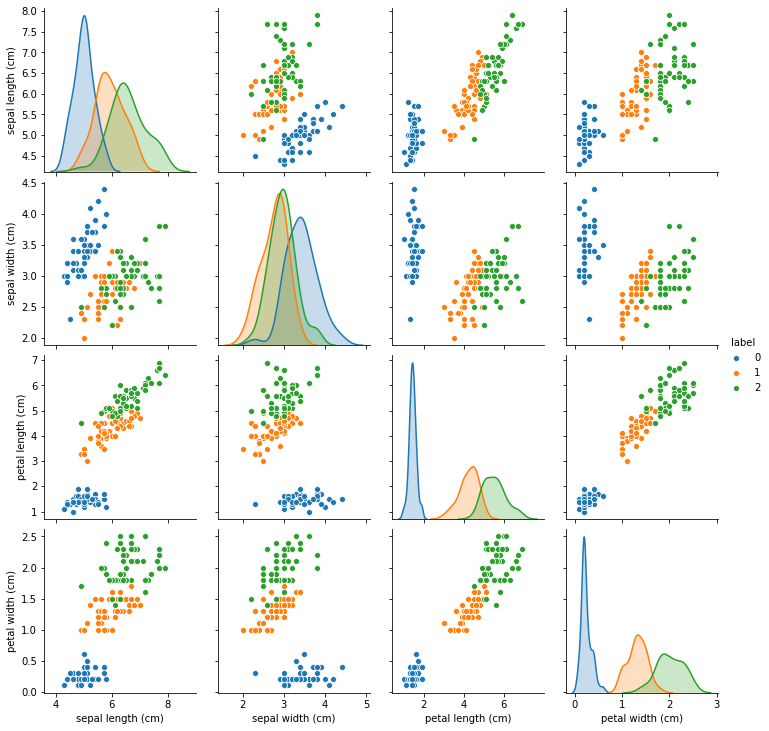

In [127]:
sns.pairplot(df, diag_kind="kde",hue='label')



## Classificando

## Funções necessárias

In [101]:
def calcula_metricas(metricas, y_test, y_predict):
    metricas['acc'] += (accuracy_score(y_test, y_predict))
    metricas['recall'] += (recall_score(y_test, y_predict, average='micro'))
    metricas['precision'] += (precision_score(y_test, y_predict, average='macro'))
    metricas['f1'] += f1_score(y_test, y_predict, average='weighted')
    # metricas['roc'] += roc_auc_score(y_test, y_predict)
    metricas['kappa'] += cohen_kappa_score(y_test, y_predict)
    metricas['balanced_acc'] += balanced_accuracy_score(y_test, y_predict)

In [102]:
def save_metricas(name, metricas):
    f = open(name, 'w')
    f.write('Acuária:' + str(metricas['acc']) + '\n')
    f.write('Recall:' + str(metricas['recall']) + '\n')
    f.write('Precisão:' + str(metricas['precision']) + '\n')
    f.write('F-Measure:' + str(metricas['f1']) + '\n')
    # f.write('Curva Roc:' + str(metricas['roc']) + '\n')
    f.write('Indice Kappa:' + str(metricas['kappa']) + '\n')
    f.write('Acuária Balanceada:' + str(metricas['balanced_acc']) + '\n')
    f.close()

In [103]:
def show_metricas(metricas):
    print('Acuária:', metricas['acc'])
    print('Recall:', metricas['recall'])
    print('Precisão:', metricas['precision'])
    print('F-Measure:', metricas['f1'])
    # print('Curva Roc:', metricas['roc'])
    print('Indice Kappa:', metricas['kappa'])
    print('Acuária Balanceada:', metricas['balanced_acc'])

In [104]:
def write_metricas(name_file, metricas, metodo):
    f = open(name_file, "a")
    f.write(metodo + ',')
    f.write(str(metricas['acc']) + ',')
    f.write(str(metricas['recall']) + ',')
    f.write(str(metricas['precision']) + ',')
    f.write(str(metricas['f1']) + ',')
    # f.write(str(round(metricas['roc'],4)) + ';')
    f.write(str(metricas['kappa']) + ',')
    f.write(str(metricas['balanced_acc']) + '\n')
    f.close()

## Aplicando KNN com K-fold

## DataFrame Cru

In [105]:
formato = 'Cru'

folds_value = 16

In [106]:
# TODO change split function
kf = KFold(n_splits=2, shuffle=True, random_state=random.randint(0, 10))
data_kfold = kf.split(data)

train = []
test = []

for train_index, test_index in data_kfold:
    train.append(train_index)
    test.append(test_index)

In [107]:
name_file = 'metricas.csv'

# Roc;
f = open(name_file, "w")
f.write('Acurácia,Recall,Precisão,F1,Kappa,Acurácia Balanceada\n')
f.close()

## Aplicando KNN com K-fold

In [108]:

# 'roc': 0,
metodo = 'KNN'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

y_predict = neigh.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [109]:
# # 'roc': 0,
# metodo = 'KNN'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     neigh = KNeighborsClassifier(n_neighbors=100)
#     neigh.fit(x_train, y_train)
#
#     y_predict = neigh.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando GaussianNB com K-fold

In [110]:
metodo = 'Gauss'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}


x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

gauss = GaussianNB()
gauss.fit(x_train, y_train)

y_predict = gauss.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.9473684210526315
Recall: 0.9473684210526315
Precisão: 0.9458874458874459
F-Measure: 0.9473684210526315
Indice Kappa: 0.9206680584551148
Acuária Balanceada: 0.9458874458874459


In [111]:
# metodo = 'Gauss'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     gauss = GaussianNB()
#     gauss.fit(x_train, y_train)
#
#     y_predict = gauss.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando DecisionTreeClassifier com K-fold

In [112]:
metodo = 'Tree'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_predict = tree.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [113]:
# metodo = 'Tree'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     tree = DecisionTreeClassifier()
#     tree.fit(x_train, y_train)
#
#     y_predict = tree.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando SVM com K-fold

In [114]:
metodo = 'SVM'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

svm = SVC()
svm.fit(x_train, y_train)

y_predict = svm.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.9473684210526315
Recall: 0.9473684210526315
Precisão: 0.9555555555555556
F-Measure: 0.9468557758031441
Indice Kappa: 0.9208333333333334
Acuária Balanceada: 0.9444444444444445


In [115]:
# metodo = 'SVM'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     svm = SVC()
#     svm.fit(x_train, y_train)
#
#     y_predict = svm.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## DataFrame Selecionado

## Aplicando

In [116]:
kf = KFold(n_splits=2, shuffle=True, random_state=random.randint(0, 10))
data_kfold = kf.split(data_scaler2)

train = []
test = []

for train_index, test_index in data_kfold:
    train.append(train_index)
    test.append(test_index)

## Aplicando KNN com K-fold

In [117]:
metodo = 'KNNSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

y_predict = neigh.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [118]:
# metodo = 'KNNSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     neigh = KNeighborsClassifier(n_neighbors=20)
#     neigh.fit(x_train, y_train)
#
#     y_predict = neigh.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando GaussianNB com K-fold

In [119]:
metodo = 'GaussSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

gauss = GaussianNB()
gauss.fit(x_train, y_train)

y_predict = gauss.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.9473684210526315
Recall: 0.9473684210526315
Precisão: 0.9440559440559442
F-Measure: 0.9473684210526315
Indice Kappa: 0.9206680584551148
Acuária Balanceada: 0.9440559440559442


In [120]:
# metodo = 'GaussSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     gauss = GaussianNB()
#     gauss.fit(x_train, y_train)
#
#     y_predict = gauss.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando DecisionTreeClassifier com K-fold

In [121]:
metodo = 'TreeSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_predict = tree.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.9473684210526315
Recall: 0.9473684210526315
Precisão: 0.9500891265597149
F-Measure: 0.9473684210526315
Indice Kappa: 0.9186295503211992
Acuária Balanceada: 0.9500891265597149


In [122]:
# metodo = 'TreeSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     tree = DecisionTreeClassifier()
#     tree.fit(x_train, y_train)
#
#     y_predict = tree.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando SVM com K-fold

In [123]:
metodo = 'SVMSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

svm = SVC()
svm.fit(x_train, y_train)

y_predict = svm.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.9473684210526315
Recall: 0.9473684210526315
Precisão: 0.9555555555555556
F-Measure: 0.947223828802776
Indice Kappa: 0.9208333333333334
Acuária Balanceada: 0.9523809523809524


In [124]:
# metodo = 'SVMSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     svm = SVC()
#     svm.fit(x_train, y_train)
#
#     y_predict = svm.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

In [125]:
analise = './metricas.csv'
metricas = pd.read_csv(
    analise,
    )
metricas

,Acurácia,Recall,Precisão,F1,Kappa,Acurácia Balanceada
KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Gauss,0.947368,0.947368,0.945887,0.947368,0.920668,0.945887
Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SVM,0.947368,0.947368,0.955556,0.946856,0.920833,0.944444
KNNSELECT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
GaussSELECT,0.947368,0.947368,0.944056,0.947368,0.920668,0.944056
TreeSELECT,0.947368,0.947368,0.950089,0.947368,0.918630,0.950089
SVMSELECT,0.947368,0.947368,0.955556,0.947224,0.920833,0.952381
